In [27]:

import keras
from keras import backend as K


from keras.datasets import mnist
import numpy as np
from keras.utils import np_utils
print(K.tensorflow_backend._get_available_gpus())
import matplotlib.pyplot as plt

['/job:localhost/replica:0/task:0/device:GPU:0']


# Data preprocessing
This section, I will normalize *x_train* to $\mu=0$ $\sigma=1$.

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
x_train = x_train.reshape(60000, 784)
x_train = np.matrix(x_train,dtype = 'float64')
x_test = x_test.reshape(10000, 784)

In [6]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

## Start Setting up network for training

Lets build a **really deep** neural network

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adagrad

In [90]:
model = Sequential()
model.add(Dense(500, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(400))
model.add(Activation('relu'))
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy'
              , optimizer='adam', metrics=['accuracy'])

In [91]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_139 (Dense)            (None, 500)               392500    
_________________________________________________________________
activation_139 (Activation)  (None, 500)               0         
_________________________________________________________________
dense_140 (Dense)            (None, 400)               200400    
_________________________________________________________________
activation_140 (Activation)  (None, 400)               0         
_________________________________________________________________
dense_141 (Dense)            (None, 300)               120300    
_________________________________________________________________
activation_141 (Activation)  (None, 300)               0         
_________________________________________________________________
dense_142 (Dense)            (None, 200)               60200     
__________

In [92]:
m_1 = model.fit(x_train, y_train, batch_size=100, epochs=15)

Epoch 1/15
60000/60000 [==============================] - 5s 87us/step - loss: 0.2231 - acc: 0.9320
Epoch 2/15
60000/60000 [==============================] - 3s 53us/step - loss: 0.1048 - acc: 0.9685
Epoch 3/15
60000/60000 [==============================] - 3s 54us/step - loss: 0.0732 - acc: 0.9776
Epoch 4/15
60000/60000 [==============================] - 3s 54us/step - loss: 0.0598 - acc: 0.9816
Epoch 5/15
60000/60000 [==============================] - 3s 54us/step - loss: 0.0539 - acc: 0.9835
Epoch 6/15
60000/60000 [==============================] - 3s 54us/step - loss: 0.0427 - acc: 0.9867
Epoch 7/15
60000/60000 [==============================] - 3s 54us/step - loss: 0.0383 - acc: 0.9886
Epoch 8/15
60000/60000 [==============================] - 3s 54us/step - loss: 0.0326 - acc: 0.9901
Epoch 9/15
60000/60000 [==============================] - 3s 54us/step - loss: 0.0319 - acc: 0.9904
Epoch 10/15
60000/60000 [==============================] - 3s 54us/step - loss: 0.0289 - acc: 0.9913

In [93]:
out = model.evaluate(x_test,y_test)
print("loss: ",out[0]," accuracy:",out[1])


10000/10000 [==============================] - 1s 125us/step
loss:  0.3214738908904179  accuracy: 0.9796


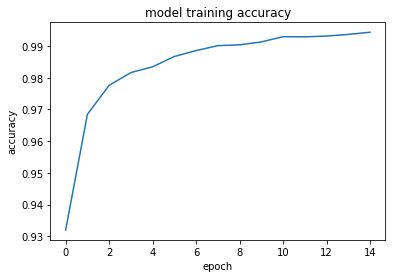

In [94]:
plt.plot(m_1.history["acc"])
plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()

## Faster, Faster, Faster....
In real world scenarios, we will normally **normalize** the image data. It will make the input image matrix $\mu=0$ $\sigma=1$.

In [95]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_train = np.matrix(x_train,dtype = 'float64')
x_test = x_test.reshape(10000, 784)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

for i in range(len(x_train)):
    x_train[i] -= np.mean(x_train[i])
    x_train[i] /= np.std(x_train[i])

In [96]:
model_2 = Sequential()
model_2.add(Dense(500, input_dim=784))
model_2.add(Activation('relu'))
model_2.add(Dense(400))
model_2.add(Activation('relu'))
model_2.add(Dense(300))
model_2.add(Activation('relu'))
model_2.add(Dense(200))
model_2.add(Activation('relu'))
model_2.add(Dense(100))
model_2.add(Activation('relu'))
model_2.add(Dense(50))
model_2.add(Activation('relu'))
model_2.add(Dense(10))
model_2.add(Activation('softmax'))

model_2.compile(loss='categorical_crossentropy'
              , optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_139 (Dense)            (None, 500)               392500    
_________________________________________________________________
activation_139 (Activation)  (None, 500)               0         
_________________________________________________________________
dense_140 (Dense)            (None, 400)               200400    
_________________________________________________________________
activation_140 (Activation)  (None, 400)               0         
_________________________________________________________________
dense_141 (Dense)            (None, 300)               120300    
_________________________________________________________________
activation_141 (Activation)  (None, 300)               0         
_________________________________________________________________
dense_142 (Dense)            (None, 200)               60200     
__________

In [97]:
m_2 = model_2.fit(x_train, y_train, batch_size=100, epochs=15)

Epoch 1/15
60000/60000 [==============================] - 5s 91us/step - loss: 0.2225 - acc: 0.9306
Epoch 2/15
60000/60000 [==============================] - 3s 55us/step - loss: 0.0994 - acc: 0.9704
Epoch 3/15
60000/60000 [==============================] - 3s 54us/step - loss: 0.0736 - acc: 0.9778
Epoch 4/15
60000/60000 [==============================] - 3s 54us/step - loss: 0.0596 - acc: 0.9815
Epoch 5/15
60000/60000 [==============================] - 3s 55us/step - loss: 0.0488 - acc: 0.9848
Epoch 6/15
60000/60000 [==============================] - 3s 54us/step - loss: 0.0447 - acc: 0.9865
Epoch 7/15
60000/60000 [==============================] - 3s 54us/step - loss: 0.0376 - acc: 0.9889
Epoch 8/15
60000/60000 [==============================] - 3s 55us/step - loss: 0.0318 - acc: 0.9901
Epoch 9/15
60000/60000 [==============================] - 3s 55us/step - loss: 0.0316 - acc: 0.9910
Epoch 10/15
60000/60000 [==============================] - 3s 54us/step - loss: 0.0272 - acc: 0.9918

In [99]:
out = model_2.evaluate(x_test,y_test)
print("loss: ",out[0]," accuracy:",out[1])

10000/10000 [==============================] - 1s 54us/step
loss:  0.34036235845837465  accuracy: 0.9784


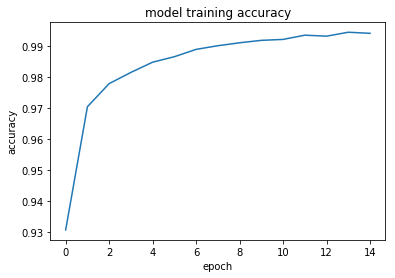

In [100]:
plt.plot(m_2.history["acc"])
plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()

In [101]:
model_3 = Sequential()
model_3.add(Dense(700, input_dim=784))
model_3.add(Activation('relu'))
model_3.add(Dense(500))
model_3.add(Activation('relu'))
model_3.add(Dense(300))
model_3.add(Activation('relu'))
model_3.add(Dense(200))
model_3.add(Activation('relu'))
model_3.add(Dense(100))
model_3.add(Activation('relu'))
model_3.add(Dense(50))
model_3.add(Activation('relu'))
model_3.add(Dense(10))
model_3.add(Activation('softmax'))
model_3.compile(loss='categorical_crossentropy'
              , optimizer='adam', metrics=['accuracy'])
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_153 (Dense)            (None, 700)               549500    
_________________________________________________________________
activation_153 (Activation)  (None, 700)               0         
_________________________________________________________________
dense_154 (Dense)            (None, 500)               350500    
_________________________________________________________________
activation_154 (Activation)  (None, 500)               0         
_________________________________________________________________
dense_155 (Dense)            (None, 300)               150300    
_________________________________________________________________
activation_155 (Activation)  (None, 300)               0         
_________________________________________________________________
dense_156 (Dense)            (None, 200)               60200     
__________

In [102]:
m_3 = model_3.fit(x_train, y_train, batch_size=250, epochs=15)

Epoch 1/15
60000/60000 [==============================] - 4s 63us/step - loss: 0.2511 - acc: 0.9211
Epoch 2/15
60000/60000 [==============================] - 1s 24us/step - loss: 0.0903 - acc: 0.9726
Epoch 3/15
60000/60000 [==============================] - 1s 24us/step - loss: 0.0634 - acc: 0.9801
Epoch 4/15
60000/60000 [==============================] - 1s 24us/step - loss: 0.0477 - acc: 0.9850
Epoch 5/15
60000/60000 [==============================] - 1s 24us/step - loss: 0.0400 - acc: 0.9874
Epoch 6/15
60000/60000 [==============================] - 1s 24us/step - loss: 0.0324 - acc: 0.9899
Epoch 7/15
60000/60000 [==============================] - 1s 24us/step - loss: 0.0315 - acc: 0.9900
Epoch 8/15
60000/60000 [==============================] - 1s 24us/step - loss: 0.0258 - acc: 0.9922
Epoch 9/15
60000/60000 [==============================] - 1s 24us/step - loss: 0.0218 - acc: 0.9932
Epoch 10/15
60000/60000 [==============================] - 1s 24us/step - loss: 0.0212 - acc: 0.9937

In [103]:
out = model_3.evaluate(x_test,y_test)
print("loss: ",out[0]," accuracy:",out[1])

10000/10000 [==============================] - 1s 146us/step
loss:  0.2621493829488842  accuracy: 0.9834


## Conclusion

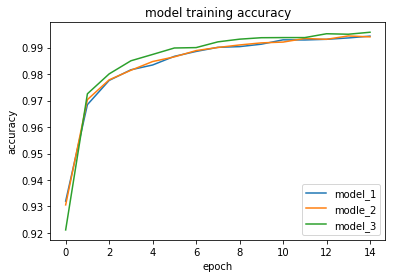

In [104]:
plt.plot(m_1.history["acc"])
plt.plot(m_2.history["acc"])
plt.plot(m_3.history["acc"])
plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['model_1','modle_2','model_3'],loc = 'best')
plt.show()

From the above three models, we see that it is really an enjoyable process of training deep neural network (well... 5 layers aren't really deep...)

Some ideas can be drawn